# Extract all variant calls for commonly mutated genes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
#Load combined data for all variants
alleles = pd.read_csv('/Users/chrisgraves/Documents/Yeast_data/Sequencing/saved_dfs/combined_alleles.csv')
alleles = alleles.drop('Unnamed: 0',1)
alleles.head()

,Chromosome,Position,Alt,Time,Ref,Is_repeat,Read_depth,Num_ref,Num_alt,Freq_ref,Freq_alt,Qual_ref,Qual_alt,Treatment,Strain
0,I,5068,ATTTTTTTTTTTTTTC,1,ATTTTTTTTTTTTTC,1,NaN,NaN,0,NaN,0,NaN,NaN,C,1
1,I,5068,ATTTTTTTTTTTTTTC,3,ATTTTTTTTTTTTTC,1,NaN,NaN,0,NaN,0,NaN,NaN,C,1
2,I,5068,ATTTTTTTTTTTTTTC,5,ATTTTTTTTTTTTTC,1,NaN,NaN,0,NaN,0,NaN,NaN,C,1
3,I,5068,ATTTTTTTTTTTTTTC,7,ATTTTTTTTTTTTTC,1,NaN,NaN,0,NaN,0,NaN,NaN,C,1
4,I,5068,ATTTTTTTTTTTTTTC,9,ATTTTTTTTTTTTTC,1,NaN,NaN,0,NaN,0,NaN,NaN,C,1


In [29]:
#function to convert alleles from long form
def to_short(df):
    out_df = pd.DataFrame(columns = ['Treatment','Strain','Chromosome','Position','Ref','Alt','Times','Alt_freqs','Q_scores','Alt_counts','Ref_counts'])
    variant_groups = df.groupby(['Chromosome','Position','Alt','Treatment','Strain'])
    ind = 0
    
    for name, group in variant_groups:
        treatment = name[3]
        strain = int(name[4])       
        chrom = name[0]
        pos = int(name[1])
        ref = list(group['Ref'])[0]
        alt = name[2]
        times = [1,3,5,7,9,12]
        freqs = list(group['Freq_alt'])
        q_scores = list(group['Qual_alt'])
        alt_counts = list(group['Num_alt'])
        ref_counts = list(group['Num_ref'])
        
        out_df.loc[ind] = (treatment,strain,chrom,pos,ref,alt,times,freqs,q_scores,alt_counts,ref_counts)
        ind = ind+1
    return(out_df)
        

## Separate all mds3 variants

In [3]:
#allele_time_series = alleles.groupby(['Treatment','Strain','Chromosome','Position'])

mds3 = alleles[(alleles['Chromosome']=='VII') & (alleles['Position'] > 124698) & (alleles['Position'] < 129161)]
mds3_H = mds3[mds3['Treatment']=='H']

num_mds3 = mds3.shape[0]/6
num_mds3_H = mds3_H.shape[0]/6


print('There are %d mutations in mds3, %d are from H strain' %(num_mds3,num_mds3_H))

There are 13 mutations in mds3, 13 are from H strain


In [30]:
mds3_short = to_short(mds3)
mds3_short

,Treatment,Strain,Chromosome,Position,Ref,Alt,Times,Alt_freqs,Q_scores,Alt_counts,Ref_counts
0,H,1,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.329268292683, 0.525423728814...","[nan, nan, nan, 38.8148148148, 35.7419354839, ...","[0.0, 0.0, 0.0, 27.0, 31.0, 20.0]","[nan, nan, nan, 55.0, 28.0, 26.0]"
1,H,3,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.307692307692, 0.4]","[nan, nan, nan, nan, 36.1, 36.5]","[0.0, 0.0, 0.0, 0.0, 20.0, 24.0]","[nan, nan, nan, nan, 45.0, 36.0]"
2,H,4,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.2, 0.0, 0.0]","[nan, nan, nan, 36.2, nan, nan]","[0.0, 0.0, 0.0, 15.0, 0.0, 0.0]","[nan, nan, nan, 60.0, nan, nan]"
3,H,5,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.258823529412, 0.233333333333...","[nan, nan, nan, 37.8181818182, 32.3571428571, ...","[0.0, 0.0, 0.0, 22.0, 14.0, 21.0]","[nan, nan, nan, 63.0, 46.0, 52.0]"
4,H,6,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.230088495575, 0.342465753425, 0.3...","[nan, nan, 37.2307692308, 36.76, 36.8823529412...","[0.0, 0.0, 26.0, 25.0, 17.0, 18.0]","[nan, nan, 87.0, 48.0, 32.0, 33.0]"
5,H,9,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.452380952381, 0.595744680851...","[nan, nan, nan, 35.2105263158, 38.2142857143, ...","[0.0, 0.0, 0.0, 38.0, 28.0, 49.0]","[nan, nan, nan, 46.0, 19.0, 16.0]"
6,H,10,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.299065420561, 0.488636363636, 0.2...","[nan, nan, 36.8125, 35.8139534884, 38.09523809...","[0.0, 0.0, 32.0, 43.0, 21.0, 22.0]","[nan, nan, 75.0, 45.0, 50.0, 36.0]"
7,H,2,VII,125345,G,T,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.210526315789, 0.261904761905...","[nan, nan, nan, 36.875, 39.6363636364, nan]","[0.0, 0.0, 0.0, 16.0, 11.0, 0.0]","[nan, nan, nan, 60.0, 31.0, nan]"
8,H,7,VII,125873,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.254545454545, 0.0, 0.3095238...","[nan, nan, nan, 39.0, nan, 39.1538461538]","[0.0, 0.0, 0.0, 14.0, 0.0, 13.0]","[nan, nan, nan, 41.0, nan, 29.0]"
9,H,4,VII,126928,C,A,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.333333333333, 0.28, 0.354838...","[nan, nan, nan, 36.625, 34.2857142857, 37.2272...","[0.0, 0.0, 0.0, 16.0, 7.0, 22.0]","[nan, nan, nan, 32.0, 18.0, 40.0]"


## Separate all sok2 variants


In [33]:
#allele_time_series = alleles.groupby(['Treatment','Strain','Chromosome','Position'])

sok2 = alleles[(alleles['Chromosome']=='XIII') & (alleles['Position'] > 303236) & (alleles['Position'] < 305593)]
sok2_H = sok2[sok2['Treatment']=='H']

num_sok2 = sok2.shape[0]/6
num_sok2_H = sok2_H.shape[0]/6


print('There are %d mutations in sok2, %d are from H strain' %(num_sok2,num_sok2_H))

There are 5 mutations in sok2, 5 are from H strain


In [35]:
sok2_short = to_short(sok2)
sok2_short

,Treatment,Strain,Chromosome,Position,Ref,Alt,Times,Alt_freqs,Q_scores,Alt_counts,Ref_counts
0,H,6,XIII,304161,C,A,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.225806451613]","[nan, nan, nan, nan, nan, 35.1428571429]","[0.0, 0.0, 0.0, 0.0, 0.0, 7.0]","[nan, nan, nan, nan, nan, 24.0]"
1,H,7,XIII,304174,C,T,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.214285714286, 0.2195121...","[nan, nan, nan, nan, 38.3333333333, 35.7777777...","[0.0, 0.0, 0.0, 0.0, 9.0, 9.0]","[nan, nan, nan, nan, 33.0, 32.0]"
2,H,2,XIII,304178,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.375, 0.536585365854, 0.7868852459...","[nan, nan, 36.619047619, 38.6818181818, 35.687...","[0.0, 0.0, 21.0, 22.0, 48.0, 47.0]","[nan, nan, 35.0, 19.0, 13.0, 14.0]"
3,H,8,XIII,304248,G,C,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.51724137931, 0.64705882...","[nan, nan, nan, nan, 37.4, 36.0]","[0.0, 0.0, 0.0, 0.0, 30.0, 22.0]","[nan, nan, nan, nan, 28.0, 12.0]"
4,H,6,XIII,304334,C,T,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.2]","[nan, nan, nan, nan, nan, 29.6666666667]","[0.0, 0.0, 0.0, 0.0, 0.0, 6.0]","[nan, nan, nan, nan, nan, 24.0]"


In [37]:
mds3_short['Gene'] = 'mds3'
sok2_short['Gene'] = 'sok2'

mutations = mds3_short.append(sok2_short,ignore_index=True)
print(mutations.shape)
mutations.head()

(18, 12)


,Treatment,Strain,Chromosome,Position,Ref,Alt,Times,Alt_freqs,Q_scores,Alt_counts,Ref_counts,Gene
0,H,1,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.329268292683, 0.525423728814...","[nan, nan, nan, 38.8148148148, 35.7419354839, ...","[0.0, 0.0, 0.0, 27.0, 31.0, 20.0]","[nan, nan, nan, 55.0, 28.0, 26.0]",mds3
1,H,3,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.0, 0.307692307692, 0.4]","[nan, nan, nan, nan, 36.1, 36.5]","[0.0, 0.0, 0.0, 0.0, 20.0, 24.0]","[nan, nan, nan, nan, 45.0, 36.0]",mds3
2,H,4,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.2, 0.0, 0.0]","[nan, nan, nan, 36.2, nan, nan]","[0.0, 0.0, 0.0, 15.0, 0.0, 0.0]","[nan, nan, nan, 60.0, nan, nan]",mds3
3,H,5,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.0, 0.258823529412, 0.233333333333...","[nan, nan, nan, 37.8181818182, 32.3571428571, ...","[0.0, 0.0, 0.0, 22.0, 14.0, 21.0]","[nan, nan, nan, 63.0, 46.0, 52.0]",mds3
4,H,6,VII,124809,C,G,"[1, 3, 5, 7, 9, 12]","[0.0, 0.0, 0.230088495575, 0.342465753425, 0.3...","[nan, nan, 37.2307692308, 36.76, 36.8823529412...","[0.0, 0.0, 26.0, 25.0, 17.0, 18.0]","[nan, nan, 87.0, 48.0, 32.0, 33.0]",mds3


# Plot frequency time series within each strain

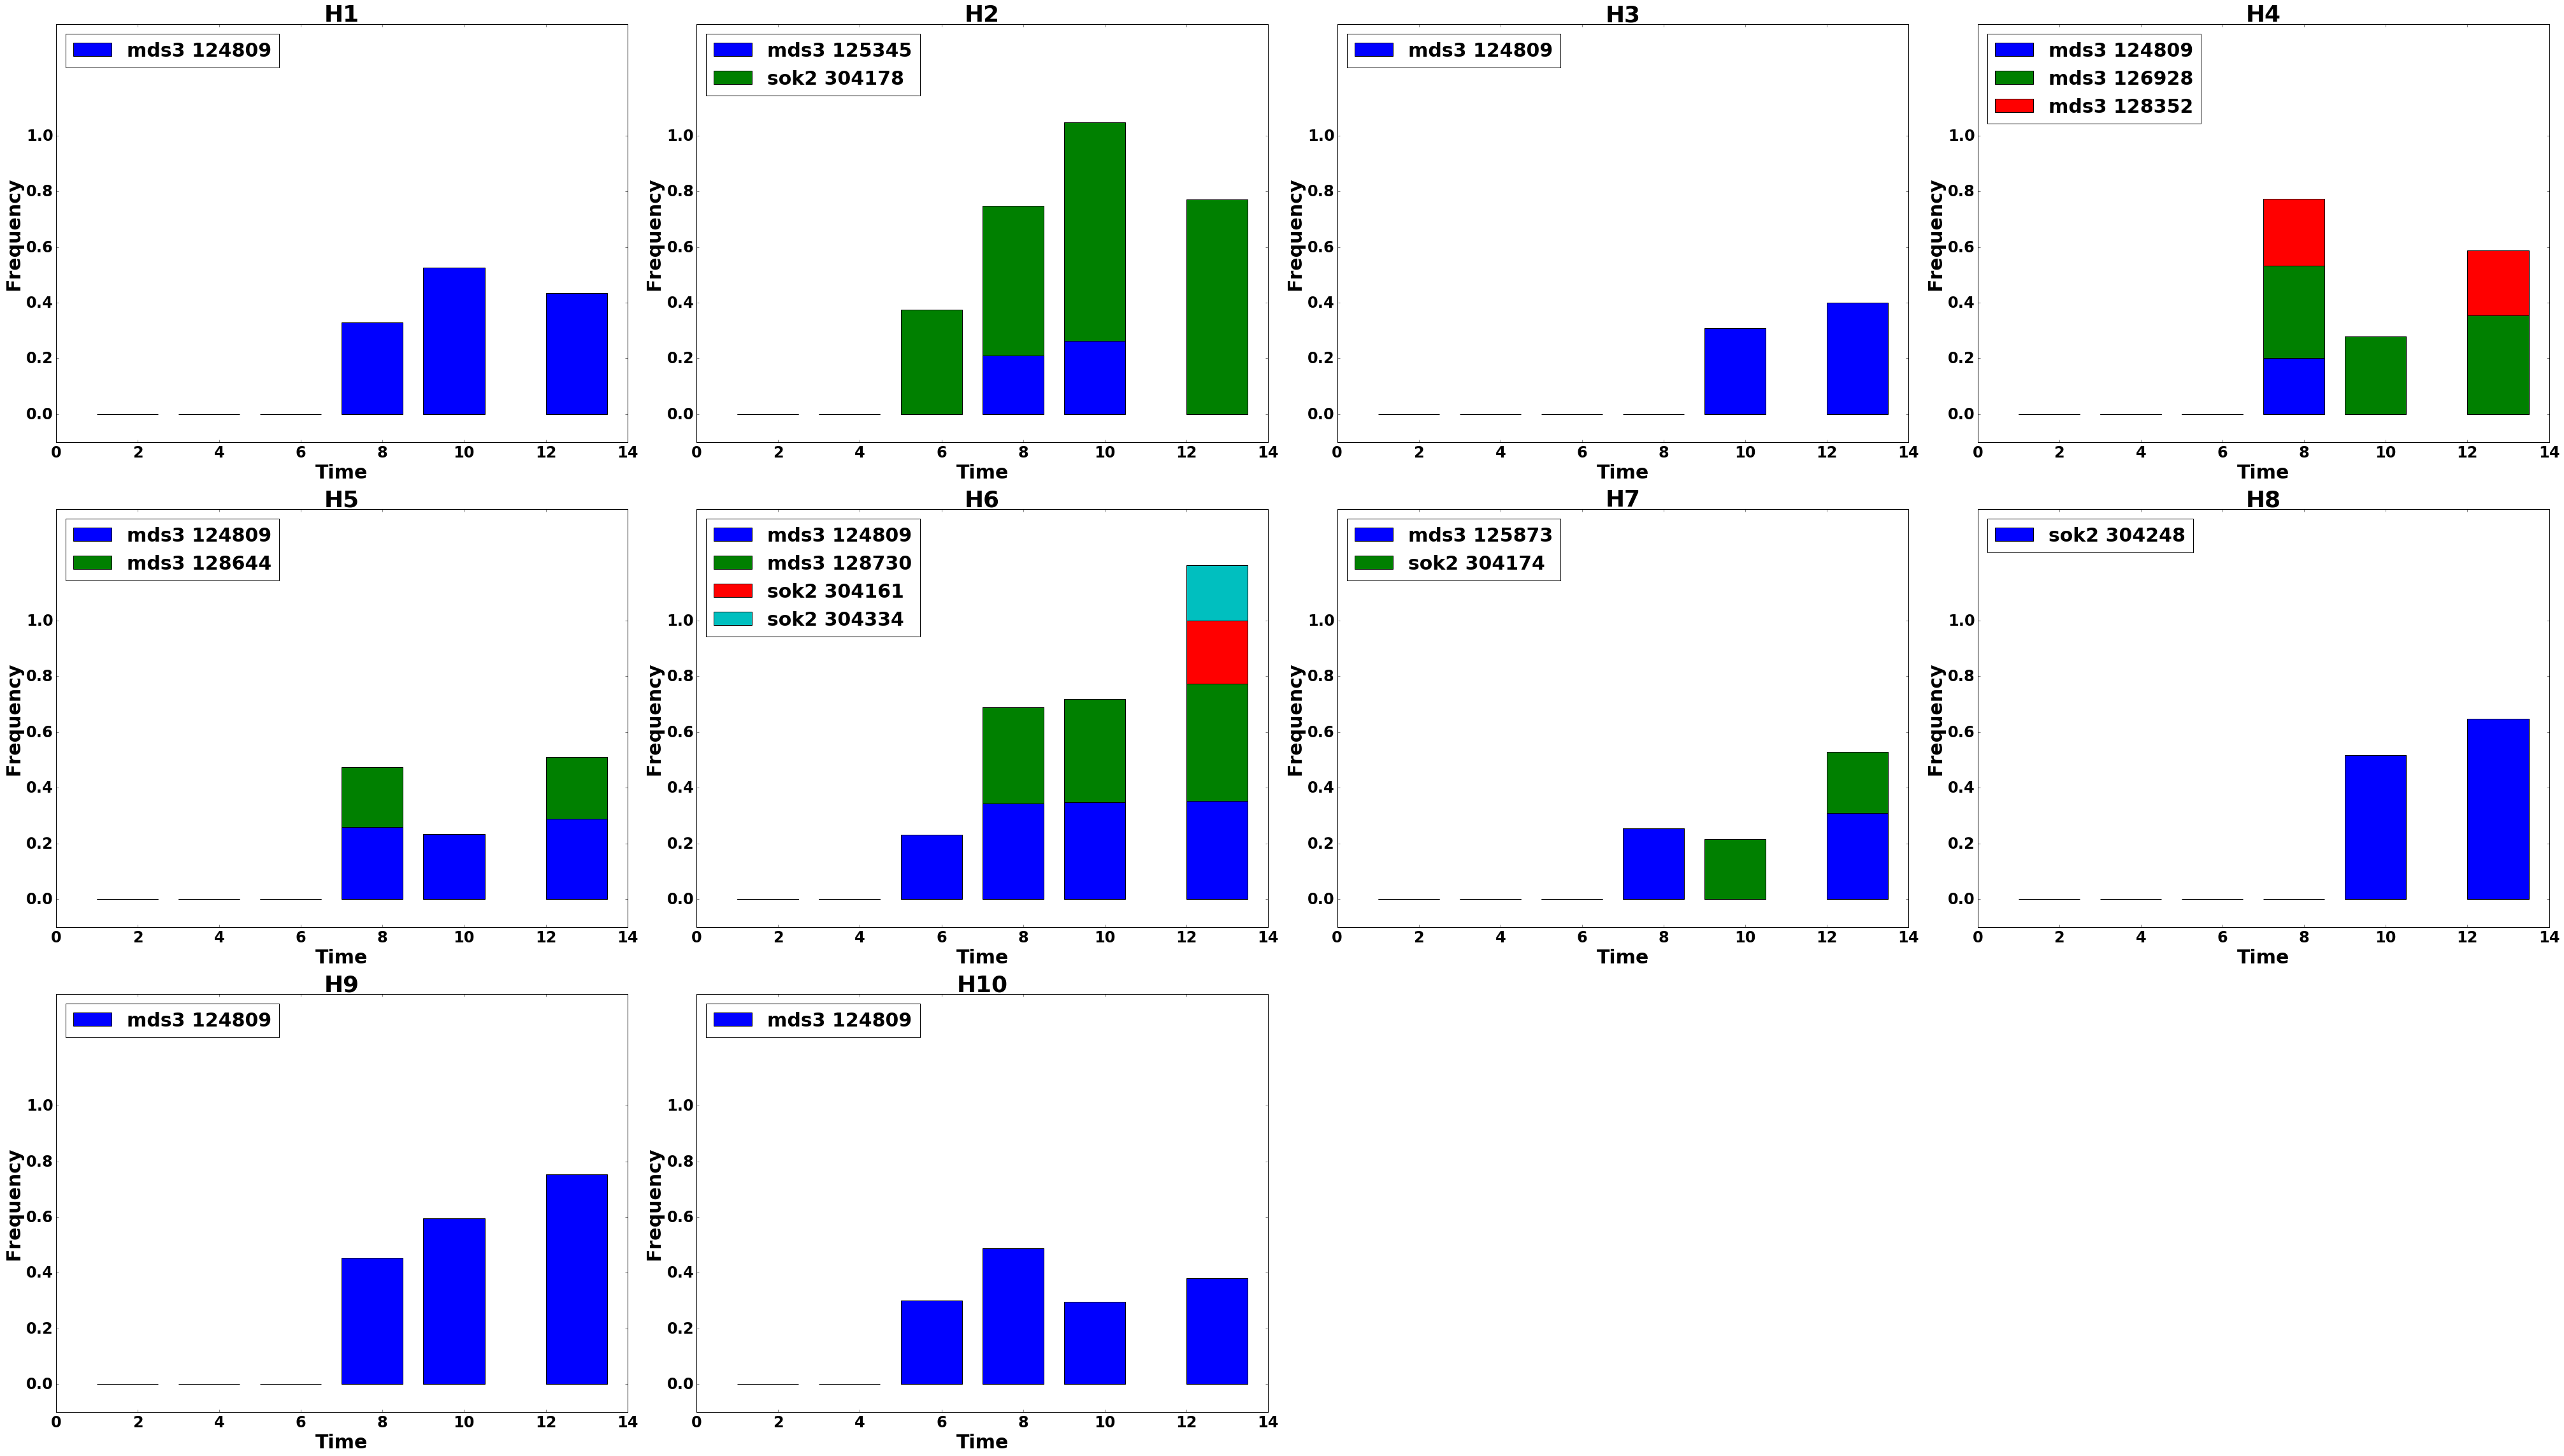

In [113]:
strains = mutations.groupby(['Treatment','Strain'])
n_strains = len(strains)
nrows = np.ceil(n_strains/float(4))
counter = 1

colors = ['b','g','r','c','m']

fig = plt.figure(figsize=(56,nrows*35))
for strain, mut in strains:
    group = mut.sort_values(by=['Gene','Position'])
    plt.subplot(n_strains,4,counter)
    nmuts = group.shape[0]
    
    counter2=0
    mut_list = []
    for row in group.itertuples():
        
        #plt.plot(row.Times,row.Alt_freqs,linewidth=4)
        #plt.scatter(row.Times,row.Alt_freqs,s=600,c='k')
        
        if counter2 == 0:
            plt.bar(row.Times, row.Alt_freqs,color=colors[counter2],width=1.5)
            bottoms = np.array(row.Alt_freqs)
        else:
            plt.bar(row.Times, row.Alt_freqs,bottom=bottoms,color=colors[counter2],width=1.5)
            bottoms= bottoms+row.Alt_freqs
            
        counter2 = counter2+1
        
        

        gene = row.Gene
        pos = row.Position
        mut_list = mut_list + [(gene+' '+str(int(pos)))]
        
        plt.ylim([-0.1,1.4])
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],size=24,fontweight='bold')
        plt.xticks([0,2,4,6,8,10,12,14],size=24,fontweight='bold')
        plt.ylabel('Frequency',fontsize=30,fontweight='bold')
        plt.xlabel('Time',fontsize=30,fontweight='bold')
        plt.title(strain[0]+str(int(strain[1])), fontsize=36,fontweight='bold')
        plt.tight_layout()
        
    plt.legend(mut_list,loc=2,prop={'weight':'bold','size':30})
    counter = counter+1
        

## Conclusions
- Mutations in mds3 and sok2 are prevalent throughout later time points of the heat shock lines but absent in C lines
- The same mds3 mutation at 124809 is observed in 7 of the 10 strains
    - Possible cross contamination or convergence?
- Frequency dynamics are consistent with clonal interference, which may explain why no fixations were observed
- Plotted data shows only variants called by freebayes, looking manually at alignments confirms the following:
    - Mutations are present at lower frequencies in earlier timesteps
    - In H2, the mds3 mutation is still present at time 12 but only at ~13% 
    - In H5, both mds3 mutations are found at t=9
    - In H4, all 3 mds3 mutations are present at the last 3 timepoints
    - In H7, the sok2 and mds3 mutations are present at t = 7,9,12
- The sok2 mutations in H6 can be observed at low frequencies at t = 9 in the alignments
- The sok2 mutations in H6 seem to occur on different backgrounds, further supporting clonal interference
    - Reads spanning the ~180 bps between sites have one mutation or the other, never both
- Frequency trajectories in some strains suggest that other mutations must be present
    - Frequencies in H1, H3, H8 and H10 level off suggesting competition with another lineage